# KNN Implementation

## Importing libraries

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split

## Distance function

The most common function is Euclidean distance.

In [10]:
def distanceFunction(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2)) ** 2))

## KNN class definition

In [70]:
class KNN:
    def __init__(self, k = 1):
        self.k = k

    def fit(self, X, y):
        """Stores the training data.

        Args:
            X (_type_): The training data features.
            y (_type_): The training data labels.
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        """Predicts the labels for the given input data.

        Args:
            X (_type_): The set of input features.

        Returns:
            np.array: the predicted values
        """
        print("X: ", X)
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        """Predicts the label for a single data point.

        Args:
            x (list): Single data point

        Returns:
            _type_: The predicted label.
        """
        print("x => ", x)
        # Distance calculated for every training points
        distances = [distanceFunction(x, x_train) for x_train in self.X_train]
        print("distances:", distances)
        

        # The k nearest indices are taken
        kIndices = np.argsort(distances)[:self.k]
        print("K: ", kIndices)
        print("Y train: ", self.y_train)

        # The labels are determined for the k neighbors
        kNeighborLabels = [self.y_train[i] for i in kIndices]
        print("neigbor labels: ", kNeighborLabels)
        
        # Majority vote taken for classification
        mostCommonNeighbors = Counter(kNeighborLabels).most_common(1)
        print("Common: ", mostCommonNeighbors)

        return mostCommonNeighbors[0][0]

        # Average value taken for regression
        # return np.mean(kNeighborLabels)

## Testing the KNN class

### Creating a simple dataset

In [71]:
# Example dataset
X = [[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]]
y = [0, 0, 0, 1, 1, 1]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training features: {X_train}\nTraining labels: {y_train}\nTesting features: {X_test}\nTesting labels: {y_test}")

Training features: [[8, 6], [3, 1], [7, 7], [6, 5]]
Training labels: [1, 0, 1, 1]
Testing features: [[1, 2], [2, 3]]
Testing labels: [0, 0]


### Training and testing

> Different values of k can result in different classifications

In [72]:
# Instantiate the KNN model
knn = KNN(k = 3)

# Fit the model with training data
knn.fit(X_train, y_train)

# Predict on the test data
predictions = knn.predict(X_test)

# Print the results
print("Predictions:", predictions)
print("Actual labels:", y_test)

X:  [[1, 2], [2, 3]]
x =>  [1, 2]
distances: [np.float64(8.06225774829855), np.float64(2.23606797749979), np.float64(7.810249675906654), np.float64(5.830951894845301)]
K:  [1 3 2]
Y train:  [1, 0, 1, 1]
neigbor labels:  [0, 1, 1]
Common:  [(1, 2)]
x =>  [2, 3]
distances: [np.float64(6.708203932499369), np.float64(2.23606797749979), np.float64(6.4031242374328485), np.float64(4.47213595499958)]
K:  [1 3 2]
Y train:  [1, 0, 1, 1]
neigbor labels:  [0, 1, 1]
Common:  [(1, 2)]
Predictions: [1 1]
Actual labels: [0, 0]


## Model Evaluation

In [73]:
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.0


## Visualization

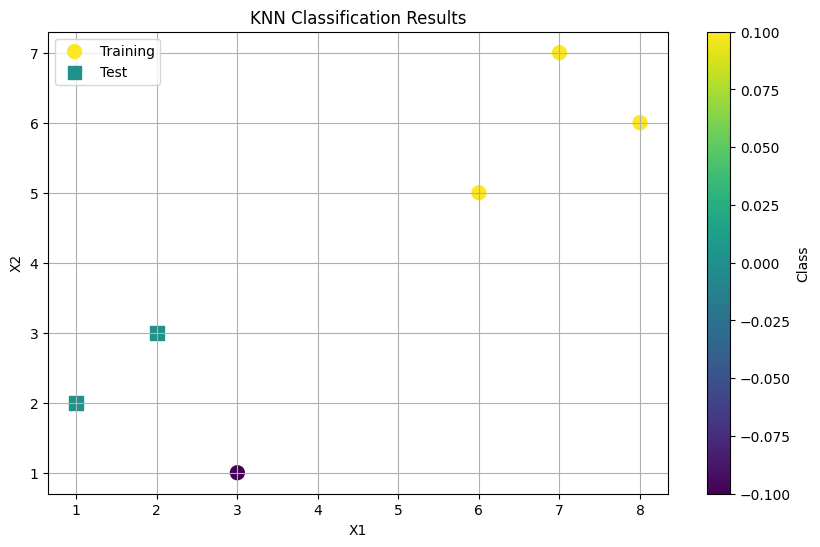

In [74]:
# Create scatter plot
plt.figure(figsize=(10,6))

# Plot training data
plt.scatter(np.array(X_train)[:,0], np.array(X_train)[:,1], 
           c=y_train, cmap='viridis', marker='o', s=100, label='Training')

# Plot test data 
plt.scatter(np.array(X_test)[:,0], np.array(X_test)[:,1],
           c=y_test, cmap='viridis', marker='s', s=100, label='Test')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('KNN Classification Results')
plt.legend()
plt.colorbar(label='Class')
plt.grid(True)
plt.show()

## Implementation using library

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Classification with KNN
knnClassifier = KNeighborsClassifier(n_neighbors=2)

# Regression with KNN
knnRegressor = KNeighborsRegressor(n_neighbors=2, weights='distance')

knnClassifier.fit(X_train, y_train)
knnRegressor.fit(X_train, y_train)

,n_neighbors,2
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [79]:
y_pred = knnClassifier.predict(X_test)
y_pred

accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [78]:
y_pred = knnRegressor.predict(X_test)
y_pred

array([0.27718637, 0.33333333])